In [1]:
import pandas as pd
import seaborn as sns
# sns.set()
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_csv('record_stats.csv', header=None)
# df.columns = ['cfg', 'elapsed', '# records', 'bytes']
# df['driver'] = df['cfg'].str.extract(r'/([a-z]+)_')

In [3]:
# d = df.groupby('cfg')['driver', '# records', 'bytes'].max()
# # ax1 = d.plot.scatter(x='# records', y='bytes', marker='o', hue='driver')
# sns.lmplot( x="# records", y="bytes", data=d, fit_reg=False, hue='driver', legend=False)

## BuildingSync

In [4]:
df = pd.read_csv('bsync_stats.csv', header=None)
df.columns = ['md_src', 'site', 'elapsed', '# records', '# triples']
df = df.groupby('site')[['md_src', '# records', '# triples']].max().reset_index()
df['triples_per_record'] = df['# triples'] / df['# records']
df
bsync_df = df

In [5]:
(df['# triples'] / df['# records']).describe()

count    17.000000
mean      2.281335
std       0.305526
min       2.000000
25%       2.000000
50%       2.363636
75%       2.444444
max       3.000000
dtype: float64

In [6]:
# fig_dims = (10,4)
# fig, ax = plt.subplots(figsize=fig_dims)
# # with sns.plotting_context("notebook", font_scale=2):
# # sns.scatterplot(x='# records', y='# triples', data=df, ax=ax, size=)
# ax.set_xlabel('# records', fontsize=16)
# ax.set_ylabel('# triples', fontsize=16)

## Haystack

In [7]:
fix_records = {
    'ghausi-improved': 2183,
    'vrtdump': 149,
    'alpha': 2032,
    'bravo': 1077,
    'charlie': 624,
    'carytown': 22,
    'gaithersburg': 147,
    'pes': 6474,
}

In [8]:
df = pd.read_csv('haystack_stats.csv', header=None)
df.columns = ['md_src', 'site', 'elapsed', '# records', '# triples']
df = df.groupby('site')[['md_src', '# records', '# triples']].max().reset_index()
for sitename, actual in fix_records.items():
    df.loc[df.site==sitename, '# records'] = actual
df['triples_per_record'] = df['# triples'] / df['# records']
haystack_df = df
df

,site,md_src,# records,# triples,triples_per_record
0,alpha,haystack,2032,7966,3.920276
1,bravo,haystack,1077,4557,4.231198
2,carytown,haystack,22,67,3.045455
3,charlie,haystack,624,2238,3.586538
4,gaithersburg,haystack,147,448,3.047619
5,ghausi-improved,haystack,2183,5513,2.525424
6,pes,haystack,6474,19426,3.000618
7,vrtdump,haystack,149,322,2.161074


## GBXML

In [9]:
df = pd.read_csv('gbxml_stats.csv', header=None)
df.columns = ['md_src', 'site', 'elapsed', '# records', '# triples']
df = df.groupby('site')[['md_src', '# records', '# triples']].max().reset_index()
df['triples_per_record'] = df['# triples'] / df['# records']
df
gbxml_df = df

## Modelica

In [10]:
df = pd.read_csv('modelica_stats.csv', header=None)
df.columns = ['md_src', 'site', 'elapsed', '# records', '# triples']
df = df.groupby('site')[['md_src', '# records', '# triples']].max().reset_index()
df['triples_per_record'] = df['# triples'] / df['# records']
df
modelica_df = df

# All Together

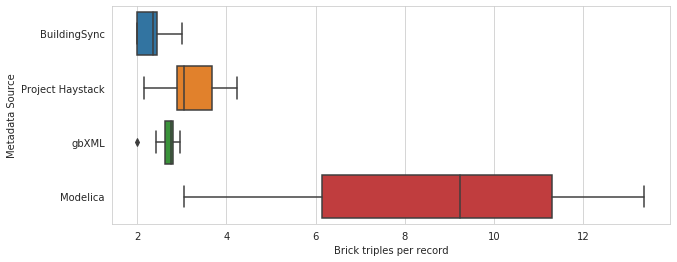

In [11]:
fig_dims = (10,4)
fig, ax = plt.subplots(figsize=fig_dims)
udf = pd.concat([bsync_df, haystack_df, gbxml_df, modelica_df])
udf.loc[udf.md_src=='bsync', 'md_src'] = 'BuildingSync'
udf.loc[udf.md_src=='haystack', 'md_src'] = 'Project Haystack'
udf.loc[udf.md_src=='gbxml', 'md_src'] = 'gbXML'
udf.loc[udf.md_src=='modelica', 'md_src'] = 'Modelica'
udf['Brick triples per record'] = udf['triples_per_record']
sns.boxplot(x='Brick triples per record', y='md_src', data=udf)
ax.set_ylabel('Metadata Source')
plt.savefig('triples_per_recdist.png')

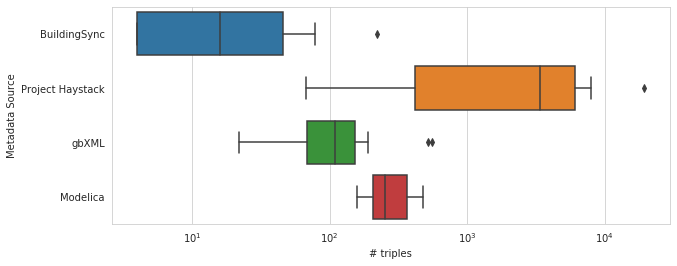

In [12]:
fig_dims = (10,4)
fig, ax = plt.subplots(figsize=fig_dims)
p = sns.boxplot(x='# triples', y='md_src', data=udf)
p.set(xscale='log')
ax.set_ylabel('Metadata Source')
plt.savefig('triples_dist.png')